In [123]:
import pandas

df = pandas.read_csv( 'kinetics.csv' )
print df.columns
df.describe()

Index([u'plate', u'description', u'a280', u'dilution', u'well', u'maxv',
       u'kobs', u's', u'correction'],
      dtype='object')


,plate,a280,dilution,maxv,kobs,s
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,16.929566,0.673479,0.045814,0.009809,93.386600,0.011725
std,9.192530,0.400123,0.044061,0.043118,357.879210,0.023576
min,1.000000,0.051000,0.010000,-0.000664,-4.964788,0.000000
25%,9.000000,0.290000,0.010000,0.000017,0.059450,0.000020
50%,16.000000,0.682000,0.010000,0.000260,2.150000,0.000290
75%,25.000000,1.000000,0.100000,0.004180,43.900000,0.004690
max,33.000000,1.513000,0.100000,1.100000,8960.000000,0.075000


Wow, just over 2500 observations of the rate of hydrolysis of pNPG (substrate) by BglB (codename: Bagel), each one the product of fitting a linear model to between 5 and 20 individual observations of pNP (product). Representing a lot of work by [a large team of people](). 

In [124]:
print df.description.unique()

['e406a' 'p329w' 'g355a' 'e177a' 'm223g' 'h119n' 'w325h' 'e423s' 'w399c'
 'f75a' 'q19s' 'v52g' 'w325l' 'm261e' 'm358t' 'k341a' 'n407a' 'n163d'
 's16a' 'y166p' 'i244n' 't175r' 'l171r' 'a192s' 's331a' 'q313r' 'i300n'
 'e177l' 'e177k' 'y294f' 'n220h' 'h119e' 'c167q' 'h315n' 'e17s' 'e406d'
 'f405a' 'e154d' 'h379r' 'w407q' 'w120f' 'w407r' 'c167a' 'm323k' 'w407g'
 'r240a' 'r76a' 's400a' 't296a' 'h178a' 'l171a' 'm323a' 'n220a' 'e164a'
 'e222a' 'e353a' 'n293a' 'q19a' 'w120a' 'w325a' 'w34a' 'w409a' 'y295g'
 'w399s' 'w399g' 'w407a' 'q284r' 'w120h' 's298e' 'r240k' 'e222h' 'e222k'
 'e222q' 'r240d' 'e222y' 'i244e' 'n163c' 'e222r' 'q19c' 's17a' 'd403a'
 'y18a' 'w325c' 'n163a' 'h373r' 'v147s' 'n354a' 'n404a' 'w399a' 't218a'
 'm221a' 't352a' 's14a' 'y295a' 'y294a' 'h101r' 'i91e' 'l219a' 'f415a'
 'k413a' 'h119a']


That's our list of mutants! Let's quickly check to see if any of these are trivially mislabeled by comparing the native amino acid against the Rosetta model. 

In [125]:
resmap = { }
for record in screed.open( 'bagel.fasta' ):
    for i, res in enumerate( record.sequence.lower() ):
        resmap.update( { i + 1: res } )

for mutant in df.description.unique():
    if mutant[0] == resmap[ int( mutant[1:-1] ) ]:
        print 'correct', mutant, resmap[ int( mutant[1:-1] ) ]
    else:
        if mutant[-1] == resmap[ int( mutant[1:-1] ) ]:
            print '>>> possibly a transposition?', mutant, 'correct native residue:', resmap[ int( mutant[1:-1] ) ]
        else:
            print '>>> mismatch', mutant, resmap[ int( mutant[1:-1] ) ]

correct e406a e
correct p329w p
correct g355a g
correct e177a e
>>> mismatch m223g h
correct h119n h
correct w325h w
correct e423s e
correct w399c w
>>> mismatch f75a y
correct q19s q
correct v52g v
correct w325l w
correct m261e m
correct m358t m
correct k341a k
>>> mismatch n407a w
correct n163d n
correct s16a s
correct y166p y
correct i244n i
correct t175r t
correct l171r l
correct a192s a
correct s331a s
correct q313r q
correct i300n i
correct e177l e
correct e177k e
correct y294f y
correct n220h n
correct h119e h
correct c167q c
correct h315n h
>>> possibly a transposition? e17s correct native residue: s
correct e406d e
correct f405a f
correct e154d e
correct h379r h
correct w407q w
correct w120f w
correct w407r w
correct c167a c
correct m323k m
correct w407g w
correct r240a r
correct r76a r
correct s400a s
correct t296a t
correct h178a h
correct l171a l
correct m323a m
correct n220a n
correct e164a e
correct e222a e
correct e353a e
correct n293a n
correct q19a q
correct w120a w
co

Well, it looks like four out of our 

In [126]:
len( df.description.unique() )

101

mutants are mislabeled. I'd drop these from the data set except that would bring it under 100 :)

Let's try fitting all of these to the Michaelis-Menten equation

Let's first make these numbers a bit friendlier by converting to mOD/min

In [142]:
df = df[( df.maxv > 0 )]
df['v'] = ( df.maxv * 0.0002 ) / ( df.dilution * 0.25 * df.a280 / 113330 ) # unit of mOD/min

In [143]:
df.v

0       3.309956e-01
1       1.453502e-01
2       7.563328e-02
4       1.315987e-01
5       4.461244e-02
6       1.453502e-02
7       4.109462e-01
8       1.181670e-01
9       7.067635e-02
10      1.678963e-02
11      2.846242e-14
12      3.901590e-01
13      9.402193e-02
14      5.628523e-02
15      2.430499e-02
16      8.714617e-03
17      3.006143e-02
18      2.718321e-14
19      2.027754e-01
20      2.534692e-01
21      1.805481e-02
22      2.398209e-02
25      9.456353e-14
26      2.944143e-01
29      4.718428e-02
30      5.283859e-02
31      1.735289e-02
33      3.256105e-01
34      2.066749e-01
35      2.963640e-02
            ...     
2479    3.912954e+00
2480    8.379056e-01
2481    7.804534e+02
2482    6.672101e+02
2483    5.584551e+02
2484    1.207959e+02
2485    3.224464e+01
2486    8.569712e+00
2487    2.449892e+00
2489    1.143218e+02
2490    6.935759e+01
2491    3.440000e+01
2492    5.625952e+00
2493    1.626421e+00
2494    4.484617e-01
2496    3.258821e-01
2497    1.192

In [148]:
grouped = df.groupby( 'description' )

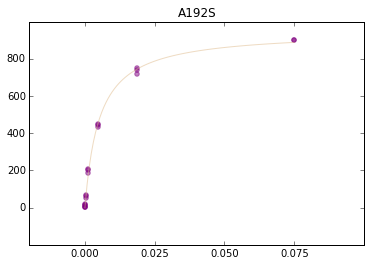

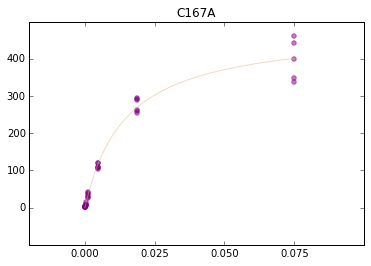

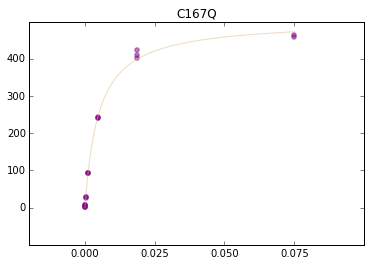

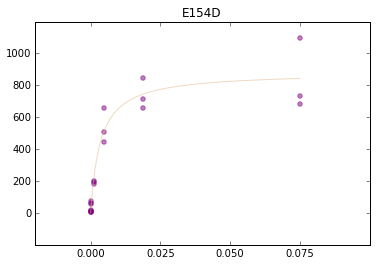

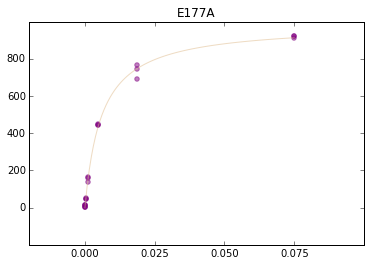

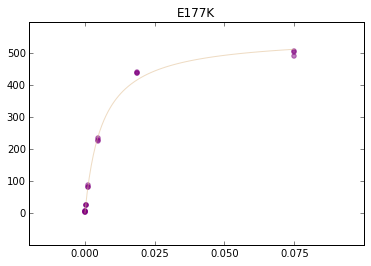

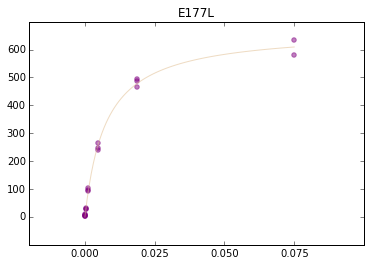

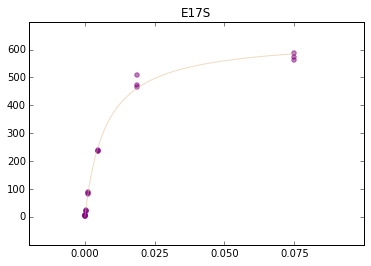

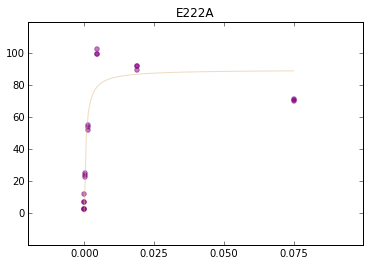

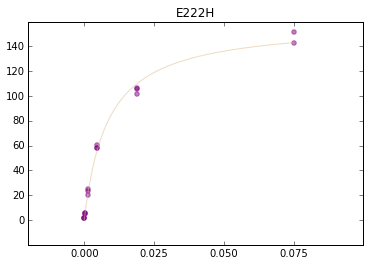

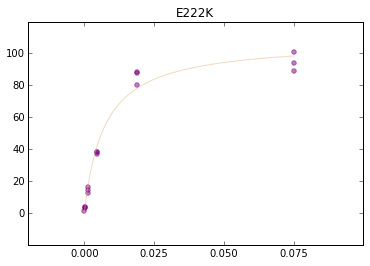

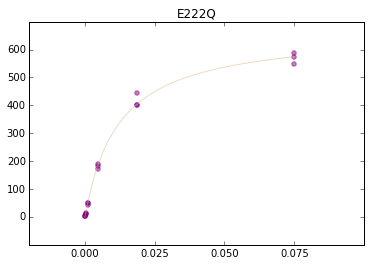

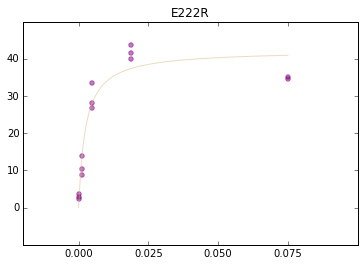

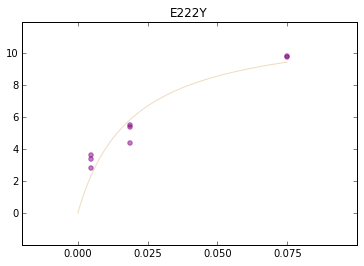

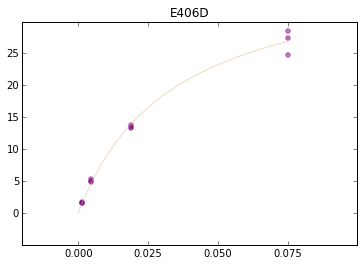

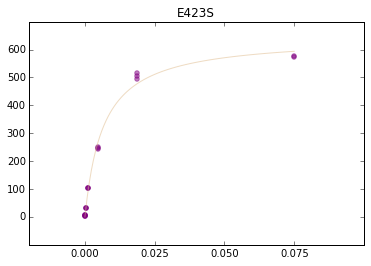

f415a below limit of detection


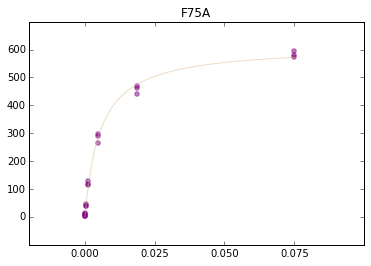

g355a below limit of detection


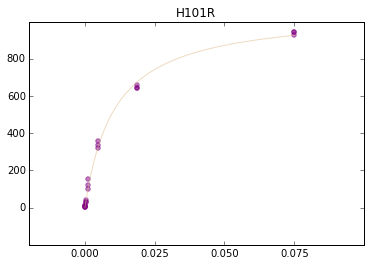

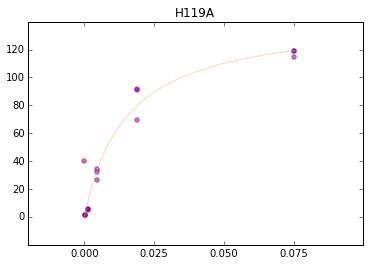

h119n below limit of detection


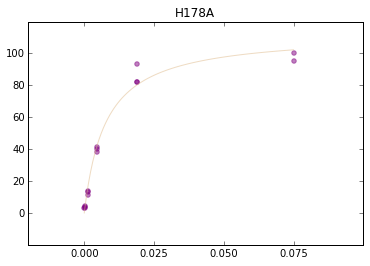

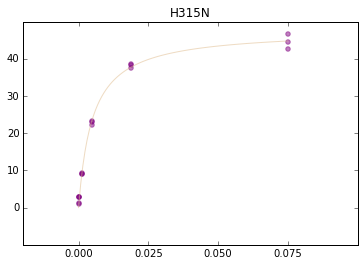

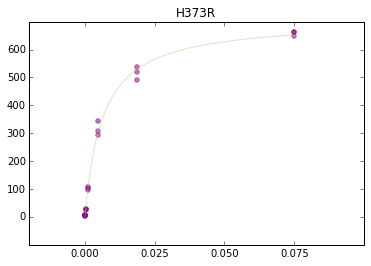

h379r below limit of detection


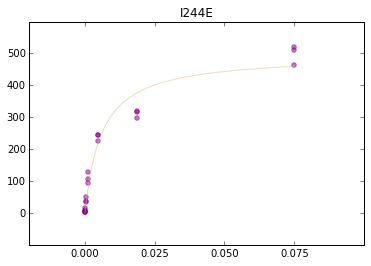

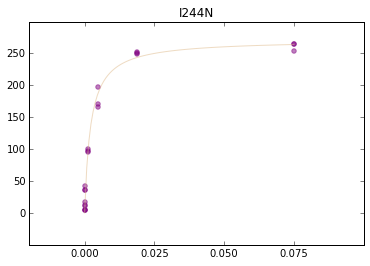

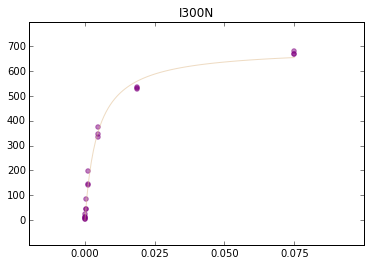

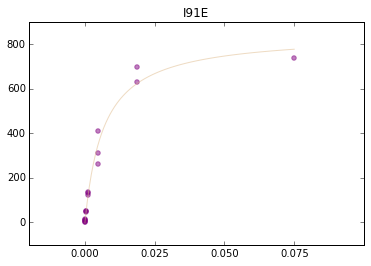

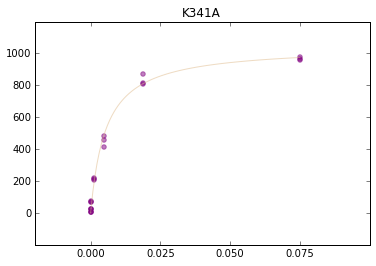

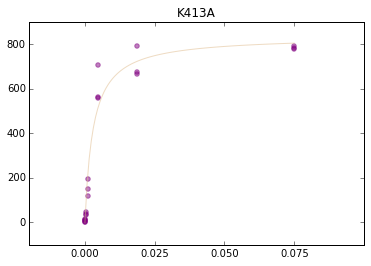

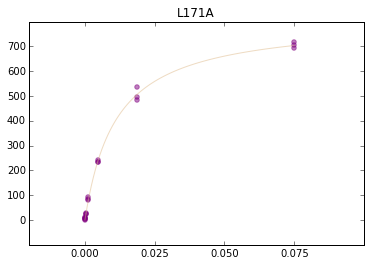

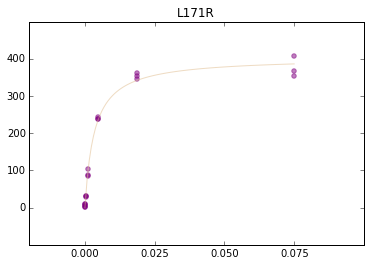

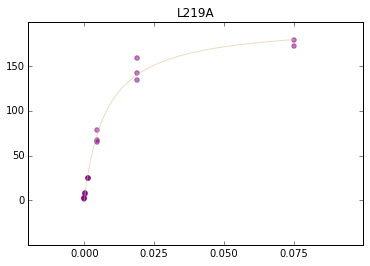

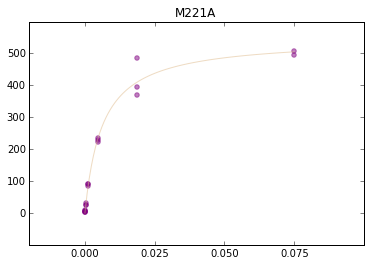

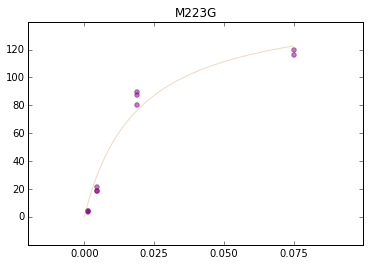

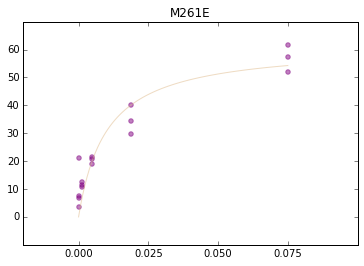

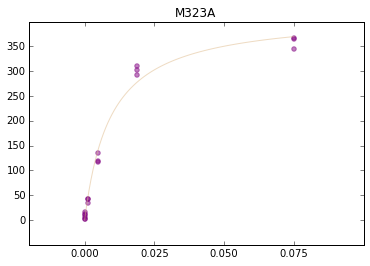

m323k below limit of detection


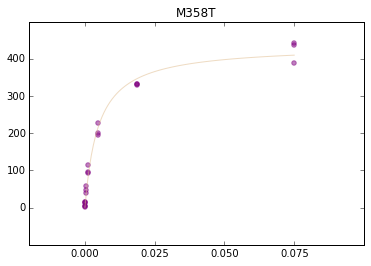

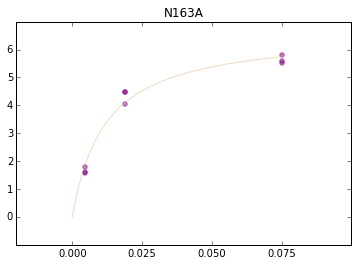

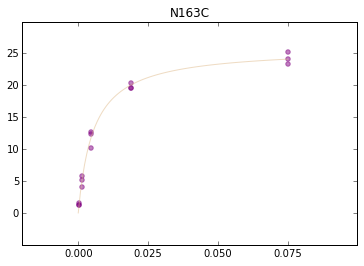

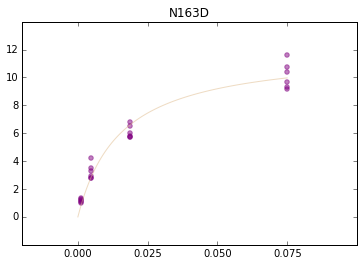

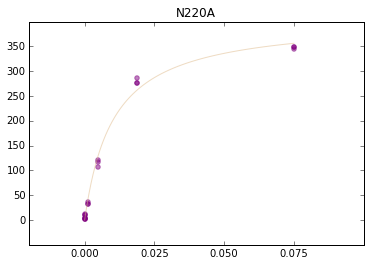

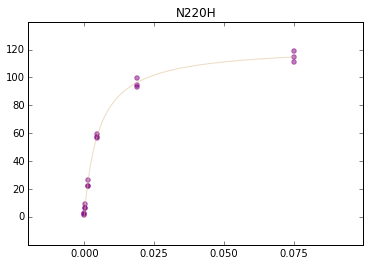

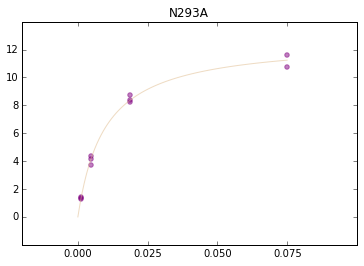

n354a below limit of detection
n404a below limit of detection


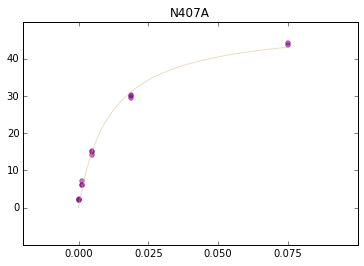

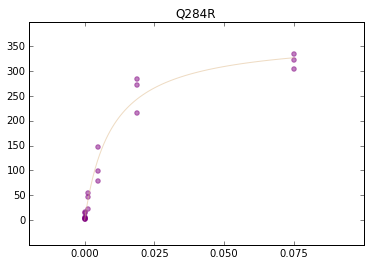

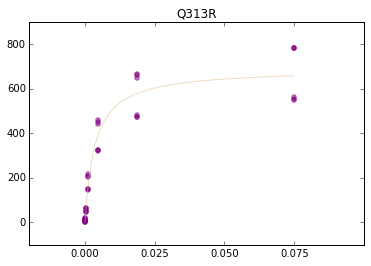

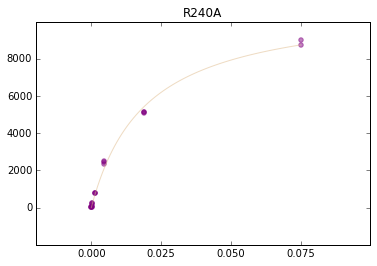

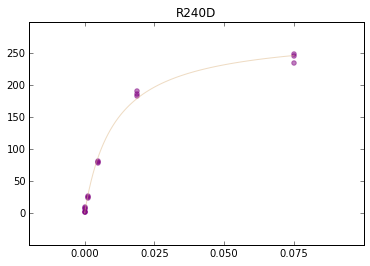

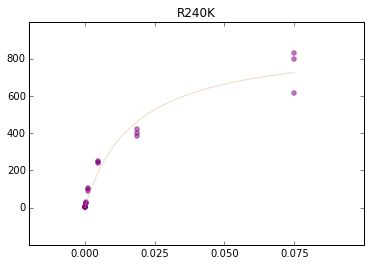

r76a below limit of detection


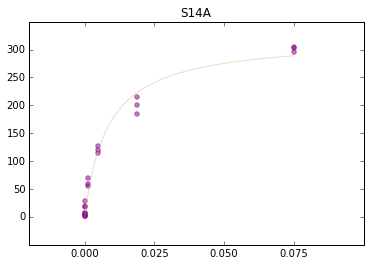

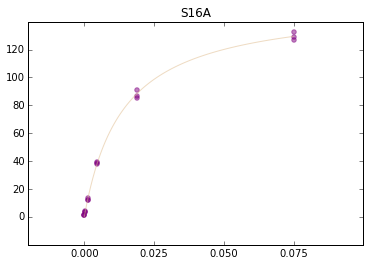

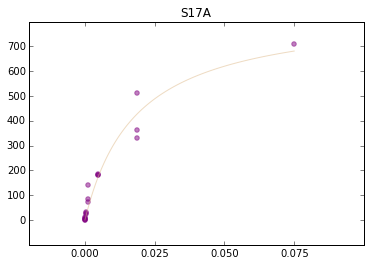

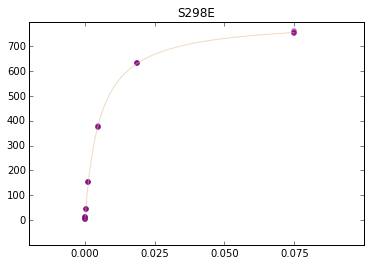

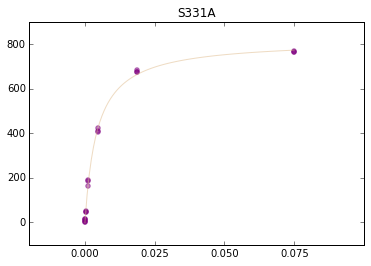

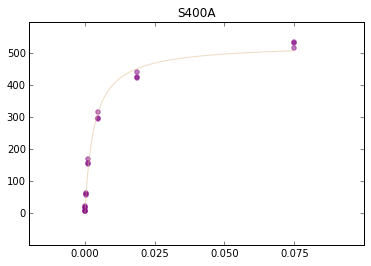

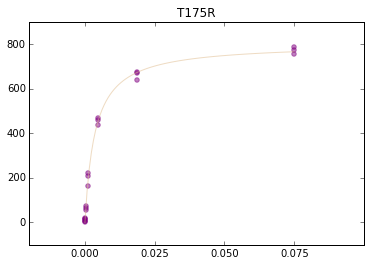

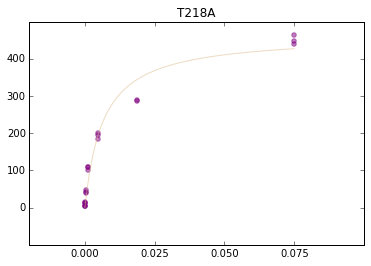

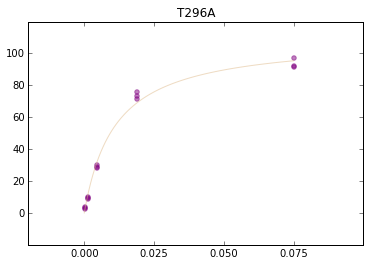

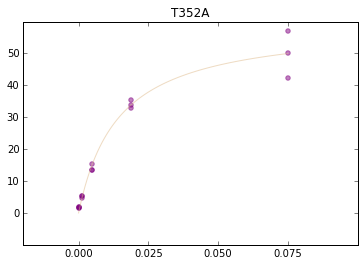

v147s below limit of detection


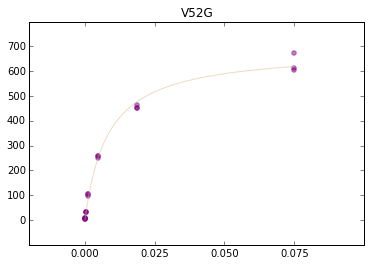

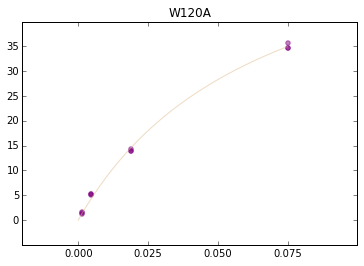

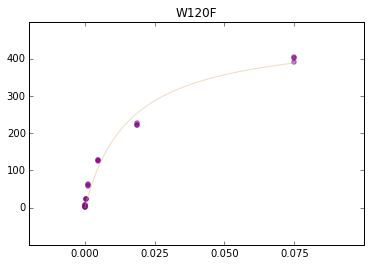

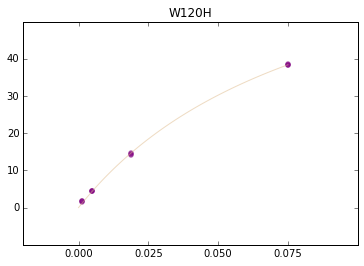

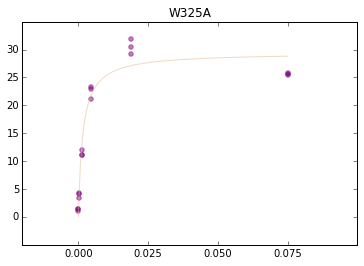

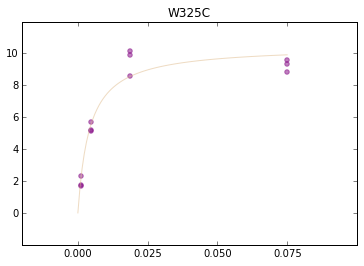

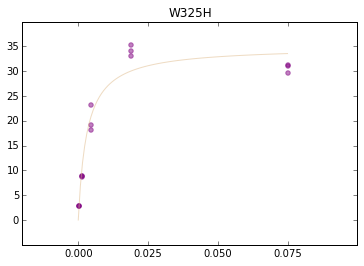

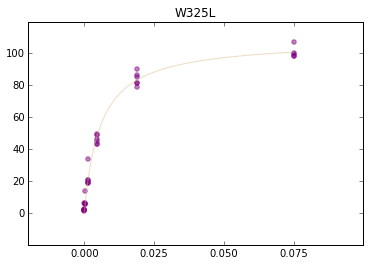

w399c below limit of detection


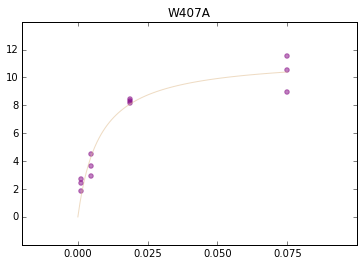

w407q below limit of detection


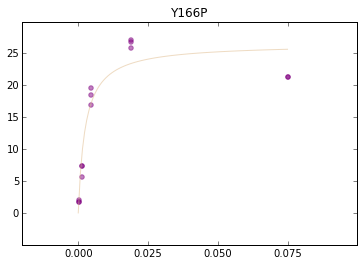

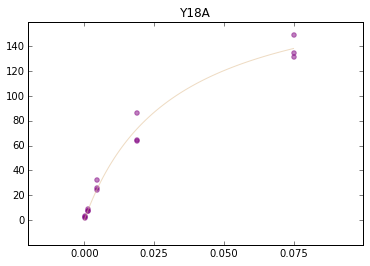

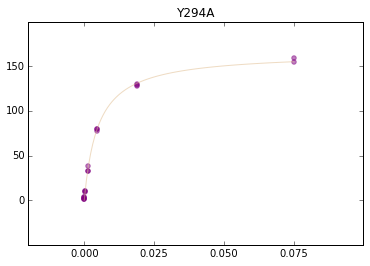

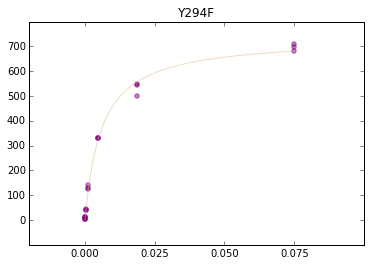

In [163]:
def mm( x, kcat, km ): return ( x * kcat ) / ( x + km )
from scipy.optimize import curve_fit
from numpy import diag, sqrt, linspace 
import matplotlib.pyplot as plt 
%matplotlib inline

plotted = []
for name, data in grouped:
    if data.v.max() < 5:
        print name, 'below limit of detection'
    else:
        try:
            p0 = ( data.v.max(), data.s.mean() )
            popt, pcov = curve_fit( mm, data.s, data.v, p0=p0 )
            #print popt, sqrt( diag( pcov ) * 100 ) # param, percent error
            plt.scatter( data.s, data.v, color='purple', alpha=0.5 )
            plt.title( name.upper() )
            xvalues = linspace( 0, 0.075, 100 )
            plt.plot( xvalues, mm( xvalues, *popt ), color='burlywood', alpha=0.5 )
            plt.xticks( [0, 0.025, 0.05, 0.075] )
            plt.yticks( plt.yticks()[0][1:-1] )
            plt.show()
            
            plotted += [ ( name, data ) ]
        except Exception as e:
            print e 


In [176]:
#df.description.unique() - plotted
plots_of = [ name for name, dat in plotted ]
a = list( plots_of ) 
b = list( df.description.unique() ) 


for plot in plots_of:
    print plot

a192s
c167a
c167q
e154d
e177a
e177k
e177l
e17s
e222a
e222h
e222k
e222q
e222r
e222y
e406d
e423s
f75a
h101r
h119a
h178a
h315n
h373r
i244e
i244n
i300n
i91e
k341a
k413a
l171a
l171r
l219a
m221a
m223g
m261e
m323a
m358t
n163a
n163c
n163d
n220a
n220h
n293a
n407a
q284r
q313r
r240a
r240d
r240k
s14a
s16a
s17a
s298e
s331a
s400a
t175r
t218a
t296a
t352a
v52g
w120a
w120f
w120h
w325a
w325c
w325h
w325l
w407a
y166p
y18a
y294a
y294f
